# Backtesting

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Union, Tuple, List, Any, Optional
import plotly.graph_objects as go


import pickle
with open('/content/drive/MyDrive/Math 628/data/ticker_data_dict.pkl', 'rb') as file:
    loaded_dict = pickle.load(file)
appl = loaded_dict['AAPL']

In [2]:
cd /content/drive/MyDrive/Math 628/week 6

/content/drive/MyDrive/Math 628/week 6


In [3]:
from Labeling import *

In [4]:
prices = appl['Close']
volatility = daily_volatility_with_log_returns(prices, 30)
filter_threshold = 1.5
moelcules = cusum_filter_events_dynamic_threshold(np.log(prices), filter_threshold * volatility)
vertical_barriers = vertical_barrier(prices, moelcules, 20)


triple_barrier_events ,tt = meta_events(prices, vertical_barriers.index, [1, 1], volatility, 0, 1, vertical_barriers)
labels = meta_labeling(triple_barrier_events, prices)

In [5]:
apple_new = pd.merge(appl, labels, left_index=True, right_index=True)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)

# Assume apple_new is a pre-loaded DataFrame with your data
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI',
                    'MACD', 'MACD_Signal', 'Return', 'Lag_Return_1',
                    'Lag_Return_2', 'Lag_Return_3']

# Filter the dataset to include only rows with label -1 and 1
apple_new = apple_new[apple_new['Label'].isin([-1, 1])]

X = apple_new[selected_columns]
y = apple_new['Label'].values

In [7]:
apple_new

,Close,High,Low,Open,Volume,Ticker,Sector,SMA_20,SMA_50,EMA_20,...,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return,End Time,Return of Label,Label
2005-05-12,1.028224,1.072208,1.024307,1.067087,970242000,AAPL,Information Technology,1.090300,1.190317,1.111300,...,-0.033615,-0.034476,-0.041561,-0.022240,-0.014877,-0.007251,0.018752,2005-05-16,0.041605,1.0
2005-05-18,1.079740,1.131559,1.054133,1.067991,636722800,AAPL,Information Technology,1.087212,1.174435,1.096687,...,-0.029792,-0.033021,0.013575,-0.005345,0.022433,0.018752,0.047712,2005-05-19,0.047712,1.0
2005-05-23,1.197837,1.202055,1.140295,1.140295,1042574400,AAPL,Information Technology,1.095045,1.171669,1.111994,...,-0.008713,-0.024586,0.058855,0.000000,0.047712,0.013575,-0.001509,2005-06-03,-0.038229,-1.0
2005-06-03,1.152045,1.162288,1.137886,1.149635,956869200,AAPL,Information Technology,1.138593,1.161046,1.160114,...,0.018225,0.009950,-0.044955,-0.006452,0.013582,-0.019724,-0.008368,2005-06-07,-0.044456,-1.0
2005-06-10,1.078837,1.126738,1.070100,1.126738,678932800,AAPL,Information Technology,1.145326,1.145133,1.141105,...,-0.003937,0.005172,-0.048871,0.019773,0.010399,-0.036393,0.002513,2005-06-15,0.036861,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16,251.039993,251.380005,247.649994,247.990005,51694800,AAPL,Information Technology,239.157499,232.705213,240.924402,...,5.427631,4.436547,0.011728,0.000686,0.005964,-0.005166,0.009720,2024-12-18,-0.011910,-1.0
2024-12-18,248.050003,254.279999,247.740005,252.160004,56774100,AAPL,Information Technology,241.418999,233.796448,242.684918,...,5.498339,4.858558,-0.021422,0.009720,0.011728,0.000686,0.007015,2024-12-20,0.025963,1.0
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300,AAPL,Information Technology,243.756998,234.720528,244.421441,...,5.600482,5.090335,0.018816,0.007015,-0.021422,0.009720,0.003065,2024-12-24,0.014578,1.0
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500,AAPL,Information Technology,249.267999,237.218951,248.926981,...,5.675828,5.688294,-0.013263,-0.013242,0.003176,0.011478,-0.007058,2025-01-02,-0.033109,-1.0


In [8]:
from itertools import combinations
from sklearn.metrics import mean_squared_error
def combinatorial_purged_cv_indices(n_samples, n_partitions=5, k=1, purge_size=0):
    """
    Generate train-test indices for Combinatorial Purged Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_partitions (int): Number of contiguous partitions to split the data into.
    - k (int): Number of partitions to select for the test set.
    - purge_size (int): Number of samples to exclude before and after each test partition.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    # 1. Partition the data contiguously
    partition_size = n_samples // n_partitions
    remainder = n_samples % n_partitions
    partition_boundaries = []
    start_idx = 0
    for i in range(n_partitions):
        size = partition_size + (1 if i < remainder else 0)
        end_idx = start_idx + size
        partition_boundaries.append((start_idx, end_idx))
        start_idx = end_idx

    # 2. Generate all combinations of partitions of size k for the test set
    partition_indices = range(n_partitions)
    test_combos = list(combinations(partition_indices, k))

    folds = []
    all_indices = np.arange(n_samples)
    for combo in test_combos:
        # Build test indices from the selected partitions
        test_indices_list = []
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            test_indices_list.append(np.arange(start, end))
        test_indices = np.concatenate(test_indices_list)

        # Start with all indices; remove test indices
        train_mask = np.ones(n_samples, dtype=bool)
        train_mask[test_indices] = False

        # 3. Purge a window before and after each test partition
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            purge_start = max(0, start - purge_size)
            purge_end = min(n_samples, end + purge_size)
            train_mask[purge_start:purge_end] = False

        train_idx = np.where(train_mask)[0]
        folds.append((train_idx, test_indices))

    return folds


In [14]:
def compute_pl_for_stratgy(data, features , model , threshold = 0.55):
  label = model.predict(features)
  prob = np.max( model.predict_proba(features) , axis = 1)
  new_data = data.loc[features.index]
  new_data['label'] = label
  new_data['prob'] = prob
  new_data = new_data[new_data['prob'] > 0.55]
  invest_length = (new_data['End Time'] - new_data.index).dt.days.astype(int)
  returns =  new_data['Return of Label'] * new_data['label'] * new_data['prob'] / invest_length

  return returns

In [10]:
n_samples = X.shape[0]

n_partitions = 8
k = 2
purge_size = 10


folds = combinatorial_purged_cv_indices(n_samples, n_partitions, k, purge_size)


sharp_ratio_scores = []
returns_scores = []

for fold, (train_idx, test_idx) in enumerate(folds, 1):
    # Extract training and test data for this fold.
    X_train, y_train = X.iloc[train_idx , : ], y[train_idx]
    X_test, y_test = X.iloc[test_idx, : ], y[test_idx]

    # Fit the model using XGBRegressor.
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced' , random_state=42)
    model.fit(X_train, y_train)
    returns = compute_pl_for_stratgy(apple_new, X_test, model)
    returns_scores.append(returns.values)
    sr = np.mean(returns)/np.std(returns) * np.sqrt(252)
    sharp_ratio_scores.append(sr)
    print(f"Fold {fold} - Sharp Ratio: {sr:.4f}")



Fold 1 - Sharp Ratio: 2.6843
Fold 2 - Sharp Ratio: 3.6810
Fold 3 - Sharp Ratio: 1.8897
Fold 4 - Sharp Ratio: 2.8378
Fold 5 - Sharp Ratio: 3.1790
Fold 6 - Sharp Ratio: 3.6354
Fold 7 - Sharp Ratio: 3.6935
Fold 8 - Sharp Ratio: 2.1459
Fold 9 - Sharp Ratio: -0.7771
Fold 10 - Sharp Ratio: 1.0981
Fold 11 - Sharp Ratio: 1.3823
Fold 12 - Sharp Ratio: 2.7241
Fold 13 - Sharp Ratio: 1.4472
Fold 14 - Sharp Ratio: -0.5135
Fold 15 - Sharp Ratio: 0.6853
Fold 16 - Sharp Ratio: 2.1752
Fold 17 - Sharp Ratio: 3.4696
Fold 18 - Sharp Ratio: 0.9046
Fold 19 - Sharp Ratio: -0.8456
Fold 20 - Sharp Ratio: -0.2504
Fold 21 - Sharp Ratio: 1.4956
Fold 22 - Sharp Ratio: -0.7941
Fold 23 - Sharp Ratio: -0.1532
Fold 24 - Sharp Ratio: 0.7798
Fold 25 - Sharp Ratio: 0.4615
Fold 26 - Sharp Ratio: 2.9008
Fold 27 - Sharp Ratio: 1.5460
Fold 28 - Sharp Ratio: 1.2380


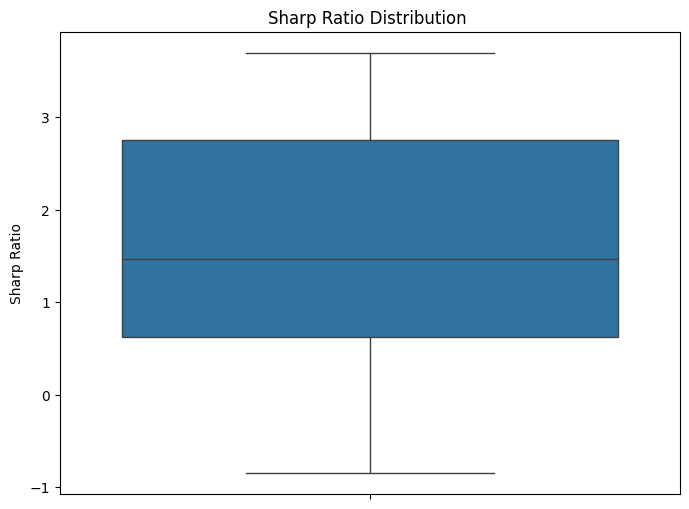

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sharp_ratio_scores)
plt.ylabel('Sharp Ratio')
plt.title('Sharp Ratio Distribution ')
plt.show()


In [12]:
all_returns = np.concatenate(returns_scores)

np.mean(all_returns)/np.std(all_returns) * np.sqrt(252)


1.6318413842590889

# Deflated Sharp Ratio


## The DSR Concept

When testing many strategies or parameter configurations, one often selects the one with the highest observed Sharpe ratio, $\hat{SR}$. Even if each strategy has a true Sharpe ratio of zero, chance alone may yield a high $\hat{SR}$ among many trials. The Deflated Sharpe Ratio (DSR) corrects for this *selection bias* by subtracting a “threshold” value, $\hat{SR}_0$, which represents the expected maximum Sharpe ratio due solely to chance when $N$ independent trials are performed. In addition, the DSR adjusts for non-Normality in returns by incorporating sample skewness and kurtosis into the variance of $\hat{SR}$.

---

## 2. Computing $\hat{SR}_0$

1. **Determine the Number of Trials, $N$.**  
   Count the independent strategies or parameter sets tested. (If some trials are correlated, adjust $N$ for the effective number of independent trials.)

2. **Estimate the Variance of the Sharpe Ratios, $\hat{\sigma}^2_{\hat{SR}}$.**

3. **Apply Extreme Value Theory or Multiple-Comparison Corrections:**  
   A standard approximation for the expected maximum Sharpe ratio is:
   
   $$
   E\Bigl[\max\{\hat{SR}_1,\ldots,\hat{SR}_N\}\Bigr] \approx \bar{\hat{SR}} + \sqrt{\hat{\sigma}^2_{\hat{SR}}}\,\Bigl[(1-\gamma)\,\Phi^{-1}\Bigl(1-\frac{1}{N}\Bigr) + \gamma\,\Phi^{-1}\Bigl(1-\frac{1}{Ne}\Bigr)\Bigr],
   $$
   
   where $\gamma \approx 0.5772$ is the Euler–Mascheroni constant and $\Phi^{-1}$ is the inverse standard normal CDF. This expected maximum is used as the penalty threshold, $\hat{SR}_0$.

---

## 3. Normal Approximation of $\hat{SR} - SR$

Under large sample conditions, the difference between the estimated and true Sharpe ratios is approximately normally distributed:
   
$$
\hat{SR} - SR \;\;\xrightarrow{d}\;\; N\Biggl(0,\; \sigma^2_{\hat{SR}}\Biggr),
$$

with the variance adjusted for non-Normality given by:

$$
\sigma^2_{\hat{SR}} = \frac{1 + \frac{1}{2}SR^2 - \frac{1}{3}\,\hat{\mu}_3\,SR + \frac{\hat{\mu}_4 - 3}{4}\,SR^2}{T},
$$

where $T$ is the number of observations, $\hat{\mu}_3$ is the sample skewness, and $\hat{\mu}_4$ is the sample kurtosis. This adjustment ensures that the uncertainty in $\hat{SR}$ properly reflects deviations from Normality.

Below is the explanation in Markdown with all formulas properly formatted:

---

## 4. The Deflated Sharpe Ratio (DSR) Formula

A commonly used form of the DSR is:

$$
\boxed{
DSR \;=\;
Z\!\Biggl[
  \frac{(\hat{SR} \;-\;\hat{SR}_0)\,\sqrt{T-1}}
       {\sqrt{\,1 \;-\;\hat{\mu}_3\,\hat{SR} \;+\;\frac{\hat{\mu}_4 - 1}{4}\,\hat{SR}^2}}
\Biggr],
}
$$


---



- The observed Sharpe ratio, $\hat{SR}$, is our starting point; however, because of the multiple testing issue, this value is likely inflated when many strategies are evaluated.  
- The threshold $\hat{SR}_0$ is derived from the expected maximum of the Sharpe ratios across $N$ independent trials (using extreme value theory), effectively capturing the selection bias.
- The difference $(\hat{SR} - \hat{SR}_0)$ quantifies how much the observed performance exceeds what could be expected by chance.
- Adjusting by $\sqrt{T-1}$ standardizes this difference relative to sample size, and dividing by the non-Normality adjustment term (which uses $\hat{\mu}_3$ and $\hat{\mu}_4$) ensures that the variability of the Sharpe ratio due to skewness and kurtosis is accounted for.
- Finally, by applying the standard normal CDF, the DSR converts this standardized value into a probability. This probability reflects the likelihood that the true Sharpe ratio is greater than the threshold after deflating for multiple testing and non-Normality.

In summary, the DSR formula combines adjustments for both selection bias (through $\hat{SR}_0$) and non-Normal return characteristics (via skewness and kurtosis) to yield a statistically robust performance measure.

In [16]:
straregy_sharp_ratio = []
strategy_returns = []
for i in range(10):
  sharp_ratio_scores = []
  returns_scores = []
  for fold, (train_idx, test_idx) in enumerate(folds, 1):
      # Extract training and test data for this fold.
      X_train, y_train = X.iloc[train_idx , : ], y[train_idx]
      X_test, y_test = X.iloc[test_idx, : ], y[test_idx]

      # Fit the model using XGBRegressor.
      model = RandomForestClassifier(n_estimators=100 * (i+1), class_weight='balanced' , random_state=42)
      model.fit(X_train, y_train)
      returns = compute_pl_for_stratgy(apple_new, X_test, model , threshold=0.55 )
      returns_scores.append(returns.values)
      sr = np.mean(returns)/np.std(returns) * np.sqrt(252)
      sharp_ratio_scores.append(sr)


  all_returns = np.concatenate(returns_scores)

  print( np.mean(all_returns)/np.std(all_returns) * np.sqrt(252) )
  straregy_sharp_ratio.append(sharp_ratio_scores)
  strategy_returns.append(all_returns)



1.6318413842590889
1.7479497751127233
1.8234767885974716
1.7571652261974533
1.7139614064809026
1.7221481834017407
1.7045003316491902
1.6810214248300943
1.6900359175088013
1.665825811474751


In [18]:
# This code is from RiskLabAI

import numpy as np
from scipy import stats as ss


def probabilistic_sharpe_ratio(
        observed_sharpe_ratio: float,
        benchmark_sharpe_ratio: float,
        number_of_returns: int,
        skewness_of_returns: float = 0,
        kurtosis_of_returns: float = 3,
        return_test_statistic: bool = False,
) -> float:
    """
    Calculates the Probabilistic Sharpe Ratio (PSR) based on observed and benchmark Sharpe ratios.

    The PSR provides a means to test whether a track record would have achieved an observed
    level of outperformance due to skill or luck. It is calculated using:

    .. math::
        \frac{(\hat{SR} - SR^*) \sqrt{T-1}}{\sqrt{1 - S \hat{SR} + \frac{K-1}{4} \hat{SR}^2}}

    Where:
    - \(\hat{SR}\) is the observed Sharpe ratio
    - \(SR^*\) is the benchmark Sharpe ratio
    - \(T\) is the number of returns
    - \(S\) is the skewness of returns
    - \(K\) is the kurtosis of returns

    :param observed_sharpe_ratio: The observed Sharpe ratio.
    :param benchmark_sharpe_ratio: The benchmark Sharpe ratio.
    :param number_of_returns: The number of return observations.
    :param skewness_of_returns: The skewness of the returns (default = 0).
    :param kurtosis_of_returns: The kurtosis of the returns (default = 3).
    :param return_test_statistic: Return the test statistic instead of the CDF value.
    :return: The Probabilistic Sharpe Ratio.
    """
    test_value = (
        (observed_sharpe_ratio - benchmark_sharpe_ratio) * np.sqrt(number_of_returns - 1)
    ) / (
        (1 - skewness_of_returns * observed_sharpe_ratio
        + (kurtosis_of_returns - 1) / 4 * observed_sharpe_ratio ** 2) ** (1 / 2)
    )

    if return_test_statistic:
        return test_value

    else:
        return ss.norm.cdf(test_value)

def benchmark_sharpe_ratio(
        sharpe_ratio_estimates: list
) -> float:
    """
    Calculates the Benchmark Sharpe Ratio based on Sharpe ratio estimates.

    The benchmark Sharpe ratio is computed using:

    .. math::
        \sigma_{SR} \left[ (1 - \gamma) \Phi^{-1}(1 - \frac{1}{N}) + \gamma \Phi^{-1}(1 - \frac{1}{N} e^{-1}) \right]

    Where:
    - \(\sigma_{SR}\) is the standard deviation of Sharpe ratio estimates
    - \(\gamma\) is the Euler's constant
    - \(\Phi^{-1}\) is the inverse of the cumulative distribution function (CDF) of a standard normal distribution
    - \(N\) is the number of Sharpe ratio estimates

    :param sharpe_ratio_estimates: List of Sharpe ratio estimates.
    :return: The Benchmark Sharpe Ratio.
    """
    standard_deviation = np.array(sharpe_ratio_estimates).std()
    benchmark_value = (
        standard_deviation * (
            (1 - np.euler_gamma) * ss.norm.ppf(1 - 1 / len(sharpe_ratio_estimates))
            + np.euler_gamma * ss.norm.ppf(1 - 1 / len(sharpe_ratio_estimates) * np.e ** (-1))
        )
    )

    return benchmark_value

In [20]:
sharp_ratio_trails = [np.mean(all_returns)/np.std(all_returns) * np.sqrt(252) for all_returns in strategy_returns]
benchmark_sr = benchmark_sharpe_ratio(sharp_ratio_trails)

selected_returns = strategy_returns[2]
kur = ss.kurtosis(selected_returns)
skew = ss.skew(selected_returns)
observed = sharp_ratio_trails[2]

probabilistic_sharpe_ratio(observed, benchmark_sr, len(selected_returns), skew, kur)

1.0